# Sequoia PyTorch data demo (Notebook version)

Adapted from [this](https://github.com/lebrice/Sequoia/blob/master/examples/basic/quick_demo.ipynb) demo in the Git repository for [Sequoia](https://github.com/lebrice/Sequoia): The Research Tree - A playground for research at the intersection of Continual, Reinforcement, and Self-Supervised Learning.

Created: `Sunday, April 11th 2021`  
Author: `Jacob A Rose`  
`Serre Laboratory - Brown University`

In [1]:
# seed = 938462

# # Imports:
# import random
# import torch
# random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.is_available()

# import sys
# from dataclasses import dataclass
# from typing import Dict, Optional, Tuple, Type

# import gym
# from gym import spaces
# from torch import Tensor, nn
# from simple_parsing import ArgumentParser

# # sys.path.extend([".", ".."])
# from sequoia.settings import Method, Setting
# from sequoia.settings.passive.cl import ClassIncrementalSetting, DomainIncrementalSetting
# from sequoia.settings.passive.cl.objects import (
#     Actions,
#     Environment,
#     Observations,
#     PassiveEnvironment,
#     Results,
#     Rewards,
# )

## Custom Datasets

In [1]:
!conda env list

# conda environments:
#
base                     /media/data/anaconda
avalanche                /media/data/conda/jrose3/envs/avalanche
fastai                *  /media/data/conda/jrose3/envs/fastai
globus-env               /media/data/conda/jrose3/envs/globus-env
herb_segmentation        /media/data/conda/jrose3/envs/herb_segmentation
light-hydra              /media/data/conda/jrose3/envs/light-hydra
pbtest                   /media/data/conda/jrose3/envs/pbtest
pyleaaves2.3_clone       /media/data/conda/jrose3/envs/pyleaaves2.3_clone
pyleaves                 /media/data/conda/jrose3/envs/pyleaves
pyleaves2                /media/data/conda/jrose3/envs/pyleaves2
pyleaves2.2              /media/data/conda/jrose3/envs/pyleaves2.2
pyleaves2.2-backup       /media/data/conda/jrose3/envs/pyleaves2.2-backup
pyleaves2.3              /media/data/conda/jrose3/envs/pyleaves2.3
pyleaves2.3_clone-2      /media/data/conda/jrose3/envs/pyleaves2.3_clone-2
pyt                      /media/data/conda/jrose3

In [2]:
import fastai

In [3]:
dir(fastai)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'version']

In [3]:
# from torchvision import transforms
# from pathlib import Path
# from glob import glob
# from PIL import Image
# from torch.utils.data import Dataset, DataLoader, random_split
# from torchvision.datasets import ImageFolder
# from torchvision.utils import make_grid

# class customImageFolderDataset(Dataset):
#     """Custom Image Loader dataset."""
#     def __init__(self, root, transform=None):
#         """
#         Args:
#             root (Str): Path to the images organized in a particular folder structure.
#             transform (Callable): Any Pytorch transform to be applied
#         """
#         # Get all image paths from a directory
#         self.image_paths = glob(f"{root}/*/*")
#         # Get the labels from the image paths
#         self.labels = [x.split("/")[-2] for x in self.image_paths]
#         # Create a dictionary mapping each label to a index from 0 to len(classes).
#         self.label_to_idx = {x:i for i,x in enumerate(set(self.labels))}
#         self.transform = transform
        
#     def __len__(self):
#         # return length of dataset
#         return len(self.image_paths)
      
#     def __getitem__(self, idx):
#         # open and send one image and label
#         img_name = self.image_paths[idx]
#         label = self.labels[idx]
#         image = Image.open(img_name)
#         if self.transform:
#             image = self.transform(image)
#         return image,self.label_to_idx[label]

    
# available_datasets = {"PNAS_family_100_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_512",
#                       "PNAS_family_100_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_1024"}        

# # TODO (Jacob): Hardcode the mean & std for PNAS, Extant Leaves, Imagenet, etc.. for standardization across lab
        
# mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

# train_dir = Path(available_datasets["PNAS_family_100_512"], 'train')
# test_dir = Path(available_datasets["PNAS_family_100_512"], 'test')
    
# data_transforms = transforms.Compose([
#                                     transforms.Resize(size=256),
#                                     transforms.CenterCrop(size=224),
#                                     transforms.ToTensor(),
#                                     transforms.Normalize(mean, std)
# ])

# train_dataset = ImageFolder(root=train_dir,transform=data_transforms)
# test_dataset = ImageFolder(root=test_dir,transform=data_transforms)

# CLASSES = list(train_dataset.class_to_idx.keys())
# num_classes = len(CLASSES)
# print("Num Images in Dataset:", len(train_dataset))
# # print("Example Image and Label:", train_dataset[2])
        
        
# train_loader = torch.utils.data.DataLoader(
#     train_dataset,
#     batch_size=16,
#     shuffle=True,
#     num_workers=4
# )

# test_loader = torch.utils.data.DataLoader(
#     test_dataset,
#     batch_size=16,
#     shuffle=True,
#     num_workers=4
# )

# train_dataset.samples

# import flash
# from flash.vision import ImageClassificationData, ImageClassifier
# from torchvision import models
# # model = models.resnet50(pretrained=True)

# model = ImageClassifier(backbone="resnet34", 
#                         num_classes=num_classes,
#                         learning_rate=0.001,
#                         optimizer="Adam")
# trainer = flash.Trainer(max_epochs=25,gpus=1)
# # trainer.finetune(model, datamodule=train_loader, strategy="freeze_unfreeze")



#####################################################
#####################################################
# train_transform = transforms.Compose([
#     transforms.Resize(target_size+image_buffer_size),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomCrop(target_size),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=mean, std=std)
# ])
# ##############
# eval_transform = transforms.Compose([
#     transforms.Resize(target_size+image_buffer_size),
#     transforms.CenterCrop(target_size),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=mean, std=std)
# ])

In [1]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

seed = 938462
# Imports:
import random
import torch
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.is_available()

from torchvision import transforms
from contrastive_learning.data.pytorch import pnas

import pretrainedmodels
# model_name = 'resnet50' # could be fbresnet152 or inceptionresnetv2
batch_size = 16
num_epochs = 15
feature_extract=True

target_size = 224
image_buffer_size = 32
seed = 87654321

model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
mean = model.mean
std = model.std

print("mean,std: ", mean,std)
############################
############################
data = pnas.PNASLeaves()
train_dataset, val_dataset, test_dataset = data.init_datasets()#train_transform=train_transform,
#                                                               eval_transform=eval_transform)

# train_dataloader, val_dataloader, test_dataloader = data.init_dataloaders()
num_classes=len(train_dataset)

# from pytorch_lightning.trainer.states import RunningStage
# dir(RunningStage)

mean,std:  [0.485, 0.456, 0.406] [0.229, 0.224, 0.225]


['EVALUATING',
 'PREDICTING',
 'TESTING',
 'TRAINING',
 'TUNING',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

## Training

In [1]:
# from torchmetrics import Accuracy
# from flash import Task
# from torch import nn, optim
# import flash
# from flash.vision import ImageClassificationData, ImageClassifier
# from torchvision import models
# import pytorch_lightning as pl
# from typing import List, Callable, Dict, Union, Type, Optional
# from pytorch_lightning.callbacks import Callback

# from contrastive_learning.data.pytorch.flash_process import Preprocess, Postprocess

# class PNASImageDataModule(ImageClassificationData):
#     """Data module for image classification tasks."""
#     preprocess_cls = Preprocess
#     postprocess_cls = Postprocess
    
#     image_size = 224
#     target_size = (224, 224)
#     image_buffer_size = 32
#     mean = [0.485, 0.456, 0.406]
#     std = [0.229, 0.224, 0.225]
    
#     @staticmethod
#     def default_train_transforms():
#         image_size = PNASImageDataModule.image_size
#         image_buffer_size = PNASImageDataModule.image_buffer_size
#         mean, std = PNASImageDataModule.mean, PNASImageDataModule.std
#         return {
#             "pre_tensor_transform": transforms.Compose([transforms.Resize(image_size+image_buffer_size),
#                                                         transforms.RandomHorizontalFlip(p=0.5),
#                                                         transforms.RandomCrop(image_size)]),
#             "to_tensor_transform": transforms.ToTensor(),
#             "post_tensor_transform": transforms.Normalize(mean, std),
#         }
#     ##############
#     @staticmethod
#     def default_val_transforms():
#         image_size = PNASImageDataModule.image_size
#         image_buffer_size = PNASImageDataModule.image_buffer_size
#         mean, std = PNASImageDataModule.mean, PNASImageDataModule.std
#         return {
#             "pre_tensor_transform": transforms.Compose([transforms.Resize(image_size+image_buffer_size),
#                                                         transforms.CenterCrop(image_size)]),
#             "to_tensor_transform": transforms.ToTensor(),
#             "post_tensor_transform": transforms.Normalize(mean, std)
#         }

#     @classmethod
#     def instantiate_preprocess(
#         cls,
#         train_transform: Dict[str, Union[nn.Module, Callable]] = 'default',
#         val_transform: Dict[str, Union[nn.Module, Callable]] = 'default',
#         test_transform: Dict[str, Union[nn.Module, Callable]] = 'default',
#         predict_transform: Dict[str, Union[nn.Module, Callable]] = 'default',
#         preprocess_cls: Type[Preprocess] = None
#     ) -> Preprocess:
#         """
#         This function is used to instantiate ImageClassificationData preprocess object.
#         Args:
#             train_transform: Train transforms for images.
#             val_transform: Validation transforms for images.
#             test_transform: Test transforms for images.
#             predict_transform: Predict transforms for images.
#             preprocess_cls: User provided preprocess_cls.
#         Example::
#             train_transform = {
#                 "per_sample_transform": T.Compose([
#                     T.RandomResizedCrop(224),
#                     T.RandomHorizontalFlip(),
#                     T.ToTensor(),
#                     T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
#                 ]),
#                 "per_batch_transform_on_device": nn.Sequential(K.RandomAffine(360), K.ColorJitter(0.2, 0.3, 0.2, 0.3))
#             }
#         """
#         train_transform, val_transform, test_transform, predict_transform = cls._resolve_transforms(
#             train_transform, val_transform, test_transform, predict_transform
#         )

#         preprocess_cls = preprocess_cls or cls.preprocess_cls
#         preprocess = preprocess_cls(train_transform, val_transform, test_transform, predict_transform)
#         return preprocess

#     @classmethod
#     def _resolve_transforms(
#         cls,
#         train_transform: Optional[Union[str, Dict]] = 'default',
#         val_transform: Optional[Union[str, Dict]] = 'default',
#         test_transform: Optional[Union[str, Dict]] = 'default',
#         predict_transform: Optional[Union[str, Dict]] = 'default',
#     ):

#         if not train_transform or train_transform == 'default':
#             train_transform = cls.default_train_transforms()

#         if not val_transform or val_transform == 'default':
#             val_transform = cls.default_val_transforms()

#         if not test_transform or test_transform == 'default':
#             test_transform = cls.default_val_transforms()

#         if not predict_transform or predict_transform == 'default':
#             predict_transform = cls.default_val_transforms()

#         return (
#             cls._check_transforms(train_transform), cls._check_transforms(val_transform),
#             cls._check_transforms(test_transform), cls._check_transforms(predict_transform)
#         )
    
#     @staticmethod
#     def _check_transforms(transform: Dict[str, Union[nn.Module, Callable]]) -> Dict[str, Union[nn.Module, Callable]]:
#         if transform and not isinstance(transform, Dict):
#             raise MisconfigurationException(
#                 "Transform should be a dict. "
#                 f"Here are the available keys for your transforms: {DataPipeline.PREPROCESS_FUNCS}."
#             )
#         if "per_batch_transform" in transform and "per_sample_transform_on_device" in transform:
#             raise MisconfigurationException(
#                 f'{transform}: `per_batch_transform` and `per_sample_transform_on_device` '
#                 f'are mutual exclusive.'
#             )
#         return transform

    

In [1]:
import pytorch_lightning as pl

dir(pl)

['Callback',
 'LightningDataModule',
 'LightningModule',
 'Trainer',
 '_PACKAGE_ROOT',
 '_PROJECT_ROOT',
 '__all__',
 '__author__',
 '__author_email__',
 '__builtins__',
 '__cached__',
 '__copyright__',
 '__doc__',
 '__docs__',
 '__file__',
 '__homepage__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_logger',
 '_root_logger',
 'accelerators',
 'callbacks',
 'core',
 'distributed',
 'info',
 'loggers',
 'logging',
 'metrics',
 'os',
 'overrides',
 'plugins',
 'profiler',
 'seed_everything',
 'trainer',
 'tuner',
 'utilities']

In [2]:
def memory_cleanup()
    """
    Cleans up GPU memory 
    https://github.com/huggingface/transformers/issues/1742
    """
    for obj in gc.get_objects():
        if torch.is_tensor(obj):
            del obj
    gc.collect()
    torch.cuda.empty_cache()

ModuleNotFoundError: No module named 'paleoai'

In [ ]:
outputs_dict = model(input_dict)
loss = loss_fn(outputs_dict, label_dict)
start_logits = outputs_dict['start_logits'].cpu().detach().numpy()
end_logits = outputs_dict['end_logits'].cpu().detach().numpy()










x = self.avgpool(x)
x = x.view(x.size(0), -1)
x = self.fc(x)

In [1]:
# feature_extract=True

seed = 938462
import pytorch_lightning as pl
pl.seed_everything(hash(f"{seed}") % 2**32 - 1)

# Imports:
import random
import torch
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.is_available()
head = None # nn.Sequential(
#             nn.AdaptiveAvgPool2d((1, 1)),
#             nn.Flatten(),
#             nn.Linear(num_features, num_classes),
#         )



from torchmetrics import Accuracy
from flash import Task
from torch import nn, optim
import flash
from flash.vision import ImageClassificationData, ImageClassifier
from torchvision import models
import pytorch_lightning as pl
from typing import List, Callable, Dict, Union, Type, Optional
from pytorch_lightning.callbacks import Callback
from contrastive_learning.data.pytorch.flash.process import Preprocess, Postprocess
from contrastive_learning.data.pytorch.pnas import PNASImageDataModule

from torchvision import transforms
from contrastive_learning.data.pytorch import pnas
num_workers = 4

seed = 873957
val_split = 0.2
batch_size = 12
pin_memory = True
name = "PNAS_family_100_512"
dims = (3,512,512)
image_size = dims[-1]

pnas.PNASImageDataModule.dims = dims
pnas.PNASImageDataModule.image_size = image_size
datamodule = pnas.PNASImageDataModule(name=name,
                                      batch_size=batch_size,
                                      val_split=val_split,
                                      num_workers=num_workers,
                                      pin_memory=pin_memory,
                                      seed=seed)

datamodule.prepare_data()
datamodule.setup()

backbone = "resnet50"
learning_rate = 1e-4
max_epochs = 30

num_classes=19
classifier = ImageClassifier(num_classes=num_classes,
                             backbone = backbone,
                             pretrained = True,
                             loss_fn = torch.nn.functional.cross_entropy,
                             optimizer = torch.optim.Adam,
                             metrics = Accuracy(),
                             learning_rate=learning_rate)    


import wandb
from pytorch_lightning.loggers import WandbLogger

wandb_logger = WandbLogger(settings=wandb.Settings(start_method="fork"),
                           config={'image_size':pnas.PNASImageDataModule.image_size,
                                   'dims':pnas.PNASImageDataModule.dims,
                                   'classifier':{
                                                 'backbone':backbone,
                                                 'lr':learning_rate,
                                                 'bsz':batch_size,
                                                 'max_epochs':max_epochs,
                                                 'pretrained':'imagenet'},
                                   'datamodule':{
                                                 'name':name,
                                                 'val_split':val_split,
                                                 'num_classes':num_classes,
                                                 'num_workers':num_workers
                                   },
                                   'seed':seed
                                  })
# model = classifier

trainer = flash.Trainer(gpus=1,
                        max_epochs=max_epochs,
                        logger=wandb_logger)
# trainer.fit(model)
trainer.fit(classifier, 
            datamodule)
#             datamodule.train_dataloader(),
#             datamodule.val_dataloader())

# trainer = flash.Trainer(max_epochs=num_epochs, gpus=1, fast_dev_run=True, log_gpu_memory='all')#True)
# trainer.fit(classifier, train_dataloader, val_dataloader) # datamodule=data_module)
# trainer.finetune(classifier, train_dataloader, val_dataloader, strategy='freeze')
wandb.run

Global seed set to 3448798869
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
wandb: Currently logged in as: jrose (use `wandb login --relogin` to force relogin)



  | Name     | Type       | Params
----------------------------------------
0 | metrics  | ModuleDict | 0     
1 | backbone | Sequential | 23.5 M
2 | head     | Sequential | 38.9 K
----------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.188    Total estimated model params size (MB)


/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/flash/vision/classification/model.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return softmax(self.head(x))


In [2]:
!conda list

# packages in environment at /media/data/conda/jrose3/envs/sequoia:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
absl-py                   0.11.0                   pypi_0    pypi
aiohttp                   3.7.3                    pypi_0    pypi
anyio                     2.2.0            py38h06a4308_1  
apipkg                    1.5                      pypi_0    pypi
argon2-cffi               20.1.0           py38h27cfd23_1  
async-timeout             3.0.1                    pypi_0    pypi
async_generator           1.10               pyhd3eb1b0_0  
attrs                     20.3.0             pyhd3eb1b0_0  
babel                     2.9.0              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
bleach                    3.3.0              pyhd3eb1b0_0  
brotlipy                  0.7.0           py38h27cfd23_1003

In [2]:
classifier.head

Sequential(
  (0): AdaptiveAvgPool2d(output_size=(1, 1))
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=2048, out_features=19, bias=True)
)

In [5]:
classifier.backbone

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [4]:
dir(classifier)#.features

['CHECKPOINT_HYPER_PARAMS_KEY',
 'CHECKPOINT_HYPER_PARAMS_NAME',
 'CHECKPOINT_HYPER_PARAMS_TYPE',
 'T_destination',
 '_DeviceDtypeModuleMixin__update_properties',
 '_LightningModule__auto_choose_log_on_epoch',
 '_LightningModule__auto_choose_log_on_step',
 '_LightningModule__get_hparams_assignment_variable',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__jit_unused_properties__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_apply_batch_transfer_handler',
 '_auto_collect_arguments',
 '_automatic_optimization',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_current_dataloader_i

In [2]:
from torchvision import datasets
new_mirror = 'https://ossci-datasets.s3.amazonaws.com/mnist'
datasets.MNIST.resources = [
                            ('/'.join([new_mirror, url.split('/')[-1]]), md5)
                            for url, md5 in datasets.MNIST.resources
                           ]

print(datasets.MNIST.resources)

# import torchvision
# torchvision.__version__

from torchvision import datasets
new_mirror = 'https://ossci-datasets.s3.amazonaws.com/mnist'
datasets.MNIST.resources = [
                            ('/'.join([new_mirror, url.split('/')[-1]]), md5)
                            for url, md5 in datasets.MNIST.resources
                           ]
train_dataset = datasets.MNIST(
   f"{os.getcwd()}/data", train=True, download=True)

dataset = MNIST(root='data/', download=True)

In [2]:
# import os
# print(os.environ)

# from pytorch_lightning import Trainer
# import os
# os.environ["WANDB_API_KEY"] = "4da22f6127e7f77527340ffede80688f6e9fb597"

# os.environ["WANDB_ENTITY"]="jrose"
# os.environ["WANDB_PROJECT"]="pytorch"
# os.environ['WANDB_START_METHOD'] = "fork"
# import wandb
# wandb.login(relogin=True)
# wandb.init()

In [1]:
import flash
import os
import wandb
import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import pytorch_lightning as pl

class CoolSystem(pl.LightningModule):

    def __init__(self, classes=10):
        super().__init__()
        self.save_hyperparameters()

        # not the best model...
        self.l1 = torch.nn.Linear(28 * 28, self.hparams.classes)

    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

    def prepare_data(self):
        MNIST(f"{os.getcwd()}/data", train=True, download=True, transform=transforms.ToTensor())

    def train_dataloader(self):
        mnist_train = MNIST(f"{os.getcwd()}/data", train=True, download=False, transform=transforms.ToTensor())
        loader = DataLoader(mnist_train, batch_size=32, num_workers=4)
        return loader

import os
# os.environ['WANDB_START_METHOD'] = "fork"
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb_logger = WandbLogger(settings=wandb.Settings(start_method="fork"))
model = CoolSystem()
try:
    trainer = flash.Trainer(gpus=1, progress_bar_refresh_rate=5, max_epochs=10, logger=wandb_logger)
    trainer.fit(model)
except Exception as error:
    print(error.exc)
    print("caught the rror!!!", type(error))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
wandb: Currently logged in as: jrose (use `wandb login --relogin` to force relogin)



  | Name | Type   | Params
--------------------------------
0 | l1   | Linear | 7.9 K 
--------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)


/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The {log:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.
# log on a step or aggregate epoch metric to the logger and/or progress bar (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


In [ ]:
class LitClassifier(pl.LightningModule):

    def __init__(self, model):
        super().__init__()
        self.__dict__.update(model.__dict__)
        self.model = model

    def configure_finetune_callback(self) -> List[Callback]:
        return []

        
        
module = LitClassifier(model)
classifier = Task(module, loss_fn=nn.functional.cross_entropy, optimizer=optim.Adam)

model.fc = model.last_linear
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

n_inputs = model.fc.in_features
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes),                   
                      nn.LogSoftmax(dim=1))


trainer = flash.Trainer(max_epochs=25,gpus=1)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())


model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

In [28]:
dir(classifier)

# from flash.core.finetuning import FreezeUnfreeze

trainer.fit(classifier, train_dataloader, val_dataloader) #DataLoader(train), DataLoader(val))
# trainer.finetune(classifier, train_dataloader=train_dataloader, val_dataloaders=val_dataloader, strategy="freeze_unfreeze")

In [3]:
dir(train_dataset)
len(train_dataset)

from matplotlib import pyplot as plt
import numpy as np
import random
random.seed(0)


def plot_random_images(dataset, num_imgs=5):
    w = min(num_imgs, 4)
    h = int(np.ceil(num_imgs/w))
    
    fig, axes = plt.subplots(h,w, figsize=(10,10))
    axes = axes.flatten()
    total_num_samples = len(dataset)
    
    selected_samples = random.sample(range(total_num_samples), num_imgs)
    
    for i, idx in enumerate(selected_samples):
        x, y = dataset[idx]

        axes[i].imshow(x.permute(1,2,0))
        axes[i].set_title(dataset.classes[y])
        
    return selected_samples, fig, axes


def show_batch(dl, invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_xticks([]); ax.set_yticks([])
        data = 1-images if invert else images
        ax.imshow(make_grid(data, nrow=10).permute(1, 2, 0))
        break



plot_random_images(train_dataset, num_imgs=5)



show_batch(set_images_dl, invert=True)

In [ ]:
t = transforms.Compose([
        transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
        transforms.ToTensor()])

train_dataset = customImageFolderDataset(root=traindir,transform=t)
train_dataloader = DataLoader(train_dataset,batch_size = 64, shuffle=True, num_workers=10)

for image_batch, label_batch in train_dataloader:
    pred = myImageNeuralNet(image_batch)

# Sequoia pipeline

# Basic Model:

In [6]:

class MyModel(nn.Module):
    """ Simple classification model without any CL-related mechanism.

    To keep things simple, this demo model is designed for supervised
    (classification) settings where observations have shape [3, 28, 28] (ie the
    MNIST variants: Mnist, FashionMnist, RotatedMnist, EMnist, etc.)
    """
    def __init__(self,
                 observation_space: gym.Space,
                 action_space: gym.Space,
                 reward_space: gym.Space):
        super().__init__()
        image_shape = observation_space[0].shape
        assert image_shape == (3, 28, 28)
        assert isinstance(action_space, spaces.Discrete)
        assert action_space == reward_space
        n_classes = action_space.n
        image_channels = image_shape[0]

        self.encoder = nn.Sequential(
            nn.Conv2d(image_channels, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, n_classes),
        )
        self.loss = nn.CrossEntropyLoss()

    def forward(self, observations: Observations) -> Tensor:
        # NOTE: here we don't make use of the task labels.
        x = observations.x
        task_labels = observations.task_labels
        features = self.encoder(x)
        logits = self.classifier(features)
        return logits

    def shared_step(
        self, batch: Tuple[Observations, Optional[Rewards]], environment: Environment
    ) -> Tuple[Tensor, Dict]:
        """Shared step used for both training and validation.
                
        Parameters
        ----------
        batch : Tuple[Observations, Optional[Rewards]]
            Batch containing Observations, and optional Rewards. When the Rewards are
            None, it means that we'll need to provide the Environment with actions
            before we can get the Rewards (e.g. image labels) back.
            
            This happens for example when being applied in a Setting which cares about
            sample efficiency or training performance, for example.
            
        environment : Environment
            The environment we're currently interacting with. Used to provide the
            rewards when they aren't already part of the batch (as mentioned above).

        Returns
        -------
        Tuple[Tensor, Dict]
            The Loss tensor, and a dict of metrics to be logged.
        """
        # Since we're training on a Passive environment, we will get both observations
        # and rewards, unless we're being evaluated based on our training performance,
        # in which case we will need to send actions to the environments before we can
        # get the corresponding rewards (image labels).
        observations: Observations = batch[0]
        rewards: Optional[Rewards] = batch[1]
        # Get the predictions:
        logits = self(observations)
        y_pred = logits.argmax(-1)

        if rewards is None:
            # If the rewards in the batch is None, it means we're expected to give
            # actions before we can get rewards back from the environment.
            rewards = environment.send(Actions(y_pred))

        assert rewards is not None
        image_labels = rewards.y

        loss = self.loss(logits, image_labels)

        accuracy = (y_pred == image_labels).sum().float() / len(image_labels)
        metrics_dict = {"accuracy": accuracy.item()}
        return loss, metrics_dict


## Creating our Method

Here by subclassing 'MethodABC' and passing in a target_setting, we indicate that we are creating a new method, and that it will work on any Setting that is an instance of ClassIncrementalSetting or one of its subclasses. 

In [7]:

class DemoMethod(Method, target_setting=ClassIncrementalSetting):
    """ Minimal example of a Method targetting the Class-Incremental CL setting.
    
    For a quick intro to dataclasses, see examples/dataclasses_example.py    
    """

    @dataclass
    class HParams:
        """ Hyper-parameters of the demo model. """
        # Learning rate of the optimizer.
        learning_rate: float = 0.001
    
    def __init__(self, hparams: HParams):
        self.hparams: DemoMethod.HParams = hparams
        self.max_epochs: int = 1
        self.early_stop_patience: int = 2

        # We will create those when `configure` will be called, before training.
        self.model: MyModel
        self.optimizer: torch.optim.Optimizer

    def configure(self, setting: ClassIncrementalSetting):
        """ Called before the method is applied on a setting (before training). 

        You can use this to instantiate your model, for instance, since this is
        where you get access to the observation & action spaces.
        """
        self.model = MyModel(
            observation_space=setting.observation_space,
            action_space=setting.action_space,
            reward_space=setting.reward_space,
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.hparams.learning_rate)

    def fit(self, train_env: PassiveEnvironment, valid_env: PassiveEnvironment):
        # configure() will have been called by the setting before we get here.
        import tqdm
        from numpy import inf
        best_val_loss = inf
        best_epoch = 0
        for epoch in range(self.max_epochs):
            self.model.train()
            # Training loop:
            with tqdm.tqdm(train_env) as train_pbar:
                train_pbar.set_description(f"Training Epoch {epoch}")
                for i, batch in enumerate(train_pbar):
                    loss, metrics_dict = self.model.shared_step(batch, environment=train_env)
                    self.optimizer.zero_grad()
                    loss.backward()
                    self.optimizer.step()
                    train_pbar.set_postfix(**metrics_dict)

            # Validation loop:
            self.model.eval()
            torch.set_grad_enabled(False)
            with tqdm.tqdm(valid_env) as val_pbar:
                val_pbar.set_description(f"Validation Epoch {epoch}")
                epoch_val_loss = 0.

                for i, batch in enumerate(val_pbar):
                    batch_val_loss, metrics_dict = self.model.shared_step(batch, environment=valid_env)
                    epoch_val_loss += batch_val_loss
                    val_pbar.set_postfix(**metrics_dict, val_loss=epoch_val_loss)
            torch.set_grad_enabled(True)

            if epoch_val_loss < best_val_loss:
                best_val_loss = valid_env
                best_epoch = epoch
            if epoch - best_epoch > self.early_stop_patience:
                print(f"Early stopping at epoch {i}.")
                break

    def get_actions(self, observations: Observations, action_space: gym.Space) -> Actions:
        """ Get a batch of predictions (aka actions) for these observations. """ 
        with torch.no_grad():
            logits = self.model(observations)
        # Get the predicted classes
        y_pred = logits.argmax(dim=-1)
        return self.target_setting.Actions(y_pred)
    
    @classmethod
    def add_argparse_args(cls, parser: ArgumentParser, dest: str = ""):
        """Adds command-line arguments for this Method to an argument parser."""
        parser.add_arguments(cls.HParams, "hparams")

    @classmethod
    def from_argparse_args(cls, args, dest: str = ""):
        """Creates an instance of this Method from the parsed arguments."""
        hparams: cls.HParams = args.hparams
        return cls(hparams=hparams)

In [8]:
method = DemoMethod(hparams=DemoMethod.HParams())
setting = DomainIncrementalSetting(dataset="fashionmnist")

results = setting.apply(method)

2021-04-11:01:30:59,439 INFO     [/media/data/jacob/GitHub/Sequoia/sequoia/settings/assumptions/incremental.py:214] Starting training on task 0.
2021-04-11:01:30:59,441 WARNING  [/media/data/jacob/GitHub/Sequoia/sequoia/settings/assumptions/incremental.py:171] On a task boundary, but since your method doesn't have an `on_task_switch` method, it won't know about it! 


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...


/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370117127/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/continuum/scenarios/class_incremental.py:72: UserWarning: When both `nb_tasks` (given value = 5) and `increment` (given value = 2 are both set, we only consider the number of tasks. The `increment` argument is ignored.
  warnings.warn(
2021-04-11:01:31:03,917 INFO     [

Done!






  0%|          | 0/300 [00:00<?, ?it/s]



Training Epoch 0:   0%|          | 0/300 [00:00<?, ?it/s]



Training Epoch 0:   0%|          | 0/300 [00:04<?, ?it/s, accuracy=0.562]



Training Epoch 0:   0%|          | 1/300 [00:04<24:53,  5.00s/it, accuracy=0.562]



Training Epoch 0:   0%|          | 1/300 [00:05<24:53,  5.00s/it, accuracy=0.5]  



Training Epoch 0:   0%|          | 1/300 [00:05<24:53,  5.00s/it, accuracy=0.562]



Training Epoch 0:   0%|          | 1/300 [00:05<24:53,  5.00s/it, accuracy=0.625]



Training Epoch 0:   1%|▏         | 4/300 [00:05<04:50,  1.02it/s, accuracy=0.625]



Training Epoch 0:   1%|▏         | 4/300 [00:05<04:50,  1.02it/s, accuracy=0.531]



Training Epoch 0:   1%|▏         | 4/300 [00:05<04:50,  1.02it/s, accuracy=0.625]



Training Epoch 0:   2%|▏         | 6/300 [00:05<02:59,  1.64it/s, accuracy=0.625]



Training Epoch 0:   2%|▏         | 6/300 [00:05<02:59,  1.64it/s, accuracy=0.688]



Training Epoch 0:   2%|▏         | 6/300 [00:05<02

## Results:

In [9]:
print(results.summary())

{
	"Task 0": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.988911
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.562996
		},
		"Task 2": {
			"n_samples": 1984,
			"accuracy": 0.490927
		},
		"Task 3": {
			"n_samples": 2016,
			"accuracy": 0.509425
		},
		"Task 4": {
			"n_samples": 1984,
			"accuracy": 0.482863
		},
		"Average": {
			"n_samples": 9984,
			"accuracy": 0.606571
		}
	},
	"Task 1": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.63004
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.96627
		},
		"Task 2": {
			"n_samples": 1984,
			"accuracy": 0.428931
		},
		"Task 3": {
			"n_samples": 2016,
			"accuracy": 0.365575
		},
		"Task 4": {
			"n_samples": 1984,
			"accuracy": 0.473286
		},
		"Average": {
			"n_samples": 9984,
			"accuracy": 0.573417
		}
	},
	"Task 2": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.764617
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.556548
		},
		"Task 2": {
			"n_samples": 1984,
			"acc

{'task_metrics': <Figure size 432x288 with 1 Axes>}

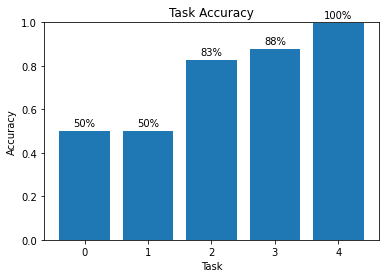

In [10]:
results.make_plots()

As you can see, our model's performance quickly deteriorates as new tasks are learned, a process refered to as "Catastrophic Forgetting".
Next, we'll try to do something about it.


## Adding a CL Mechanism

First, by taking a look at the logs above, you will notice that we are told that our Method doesn't have an `on_task_switch` method.

A Setting would call this `on_task_switch` method during training or evaluation if we are allowed to know when task boundaries occur in that setting. Additionally, if it's allowed in that Setting, we might also receive the index of the new task we are switching to.

Using this information, here we will add an EWC-like penalty to our model, which will prevent its weights from changing too much between tasks. We'll use the `on_task_switch` method to update the 'anchor' weights everytime a task boundary is encountered.


In [7]:
from copy import deepcopy
from sequoia.utils import dict_intersection

class MyImprovedModel(MyModel):
    """ Adds an ewc-like penalty to the demo model. """
    def __init__(self,
                 observation_space: gym.Space,
                 action_space: gym.Space,
                 reward_space: gym.Space,
                 ewc_coefficient: float = 1.0,
                 ewc_p_norm: int = 2,
                 ):
        super().__init__(
            observation_space,
            action_space,
            reward_space,
        )
        self.ewc_coefficient = ewc_coefficient
        self.ewc_p_norm = ewc_p_norm

        self.previous_model_weights: Dict[str, Tensor] = {}

        self._previous_task: Optional[int] = None
        self._n_switches: int = 0

    def shared_step(self, batch: Tuple[Observations, Rewards], *args, **kwargs):
        base_loss, metrics = super().shared_step(batch, *args, **kwargs)
        ewc_loss = self.ewc_coefficient * self.ewc_loss()
        metrics["ewc_loss"] = ewc_loss
        return base_loss + ewc_loss, metrics

    def on_task_switch(self, task_id: Optional[int])-> None:
        """ Executed when the task switches (to either a known or unknown task).
        """
        if self._previous_task is None and self._n_switches == 0:
            print("Starting the first task, no EWC update.")
        elif task_id is None or task_id != self._previous_task:
            # NOTE: We also switch between unknown tasks.
            print(f"Switching tasks: {self._previous_task} -> {task_id}: ")
            print(f"Updating the EWC 'anchor' weights.")
            self._previous_task = task_id
            self.previous_model_weights.clear()
            self.previous_model_weights.update(deepcopy({
                k: v.detach() for k, v in self.named_parameters()
            }))
        self._n_switches += 1

    def ewc_loss(self) -> Tensor:
        """Gets an 'ewc-like' regularization loss.

        NOTE: This is a simplified version of EWC where the loss is the P-norm
        between the current weights and the weights as they were on the begining
        of the task.
        """
        if self._previous_task is None:
            # We're in the first task: do nothing.
            return 0.

        old_weights: Dict[str, Tensor] = self.previous_model_weights
        new_weights: Dict[str, Tensor] = dict(self.named_parameters())

        loss = 0.
        for weight_name, (new_w, old_w) in dict_intersection(new_weights, old_weights):
            loss += torch.dist(new_w, old_w.type_as(new_w), p=self.ewc_p_norm)
        return loss


In [8]:

class ImprovedDemoMethod(DemoMethod):
    """ Improved version of the demo method, that adds an ewc-like regularizer.
    """
    # Name of this method:    
    @dataclass
    class HParams(DemoMethod.HParams):
        """ Hyperparameters of this new improved method. (Adds ewc params)."""
        # Coefficient of the ewc-like loss.
        ewc_coefficient: float = 1.0
        # Distance norm used in the ewc loss.
        ewc_p_norm: int = 2

    def __init__(self, hparams: HParams):
        super().__init__(hparams=hparams)
    
    def configure(self, setting: ClassIncrementalSetting):
        # Use the improved model, with the added EWC-like term.
        self.model = MyImprovedModel(
            observation_space=setting.observation_space,
            action_space=setting.action_space,
            reward_space=setting.reward_space,
            ewc_coefficient=self.hparams.ewc_coefficient,
            ewc_p_norm = self.hparams.ewc_p_norm,
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.hparams.learning_rate)

    def on_task_switch(self, task_id: Optional[int]):
        self.model.on_task_switch(task_id)

## Running the "Improved" method

In [9]:
improved_method = ImprovedDemoMethod(hparams=ImprovedDemoMethod.HParams())
setting = DomainIncrementalSetting(dataset="fashionmnist")
improved_results = setting.apply(improved_method)

2021-02-25:17:29:31,526 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/assumptions/incremental.py:184] Starting training on task 0.
2021-02-25:17:29:31,580 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/passive/cl/class_incremental_setting.py:433] Number of train tasks: 5.
2021-02-25:17:29:31,581 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/passive/cl/class_incremental_setting.py:434] Number of test tasks: 5.
Validation Epoch 0: 100%|██████████| 75/75 [00:00<00:00, 147.76it/s, accuracy=1, ewc_loss=0, val_loss=tensor(3.3188)]
2021-02-25:17:29:35,880 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/assumptions/incremental.py:212] Finished Training on task 0.
2021-02-25:17:29:35,921 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/passive/cl/class_incremental_setting.py:433] Number of train tasks: 5.
2021-02-25:17:29:35,921 INFO     [/home/fabrice/repos/Sequoia/sequoia/settings/passive/cl/class_incremental_setting.py:434] Number of test tasks: 5.
2021

In [10]:
## Improved Results

In [11]:
print(improved_results.summary())

{
	"Task 0": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.981351
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.752976
		},
		"Task 2": {
			"n_samples": 1984,
			"accuracy": 0.53125
		},
		"Task 3": {
			"n_samples": 2016,
			"accuracy": 0.640377
		},
		"Task 4": {
			"n_samples": 1984,
			"accuracy": 0.546371
		}
	},
	"Task 1": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.927419
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.896825
		},
		"Task 2": {
			"n_samples": 1984,
			"accuracy": 0.457157
		},
		"Task 3": {
			"n_samples": 2016,
			"accuracy": 0.700397
		},
		"Task 4": {
			"n_samples": 1984,
			"accuracy": 0.741935
		}
	},
	"Task 2": {
		"Task 0": {
			"n_samples": 1984,
			"accuracy": 0.970766
		},
		"Task 1": {
			"n_samples": 2016,
			"accuracy": 0.780258
		},
		"Task 2": {
			"n_samples": 1984,
			"accuracy": 0.94254
		},
		"Task 3": {
			"n_samples": 2016,
			"accuracy": 0.990079
		},
		"Task 4": {
			"n_samples": 1984,
			"accur

{'task_metrics': <Figure size 432x288 with 1 Axes>}

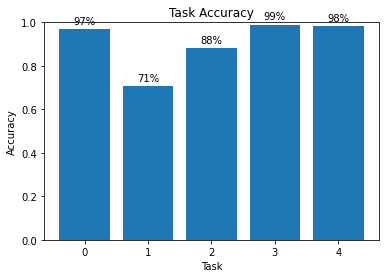

In [12]:
improved_results.make_plots()

## Final Results


{'task_metrics': <Figure size 432x288 with 1 Axes>}

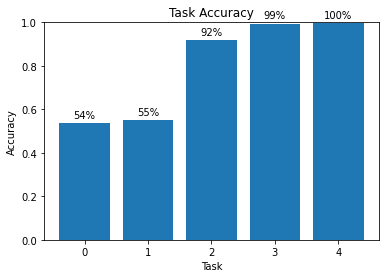

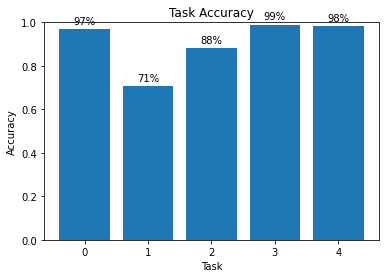

In [13]:
results.make_plots()
improved_results.make_plots()

In [25]:
# import os
# os.environ["WANDB_ENTITY"]="jrose"
# os.environ['WANDB_START_METHOD'] = "fork"
# os.environ["WANDB_PROJECT"]="pytorch"

# import wandb
# wandb.login(relogin=True)

# !echo $WANDB_ENTITY
# !export WANDB_ENTITY="jrose"

# import gc
# gc.collect()
# torch.cuda.empty_cache()

# import time

# logger = pl.loggers.WandbLogger(name='new_test', project='test')
# while True:
#     try:
#         logger._experiment = wandb.init(name=logger._name, project=logger._project)
#         break
#     except:
#         print("Retrying")
#         time.sleep(10)



#     @classmethod
#     def from_filepaths(
#         cls,
#         train_filepaths: Optional[Union[str, pathlib.Path, Sequence[Union[str, pathlib.Path]]]] = None,
#         train_labels: Optional[Sequence] = None,
#         val_filepaths: Optional[Union[str, pathlib.Path, Sequence[Union[str, pathlib.Path]]]] = None,
#         val_labels: Optional[Sequence] = None,
#         test_filepaths: Optional[Union[str, pathlib.Path, Sequence[Union[str, pathlib.Path]]]] = None,
#         test_labels: Optional[Sequence] = None,
#         predict_filepaths: Optional[Union[str, pathlib.Path, Sequence[Union[str, pathlib.Path]]]] = None,
#         train_transform: Union[str, Dict] = 'default',
#         val_transform: Union[str, Dict] = 'default',
#         test_transform: Union[str, Dict] = 'default',
#         predict_transform: Union[str, Dict] = 'default',
#         batch_size: int = 64,
#         num_workers: Optional[int] = None,
#         seed: Optional[int] = 42,
#         preprocess_cls: Optional[Type[Preprocess]] = None,
#         **kwargs,
#     ) -> 'ImageClassificationData':

# classifier

# from pytorch_lightning.trainer.states import RunningStage, TrainerState

# print(dir(RunningStage))#,
# print(dir(TrainerState))

# data_module
# vars(data_module)

# dir(model)

# model.features

# from torchsummary import summary
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
# model = model.to(device)
# print(device)
# # children = list(model.children())

# summary(model, input_size=(3, 224, 224))

# # dir(backbone[-2])
# dir(model)

# import numpy as np
# feats = model.features(torch.Tensor(np.ones((16,3,224,224))).cuda(device))
# feats.size()

# model.last_linear

# backbone
# = children[:-2]
# backbone

# list(backbone[-1].named_parameters())

# layers = list(model.modules())

# layers[-4].num_features

# model.last_linear.out_features

# # dir
# list(model.avgpool.parameters())
# # model.avgpool.output_size

# preprocess_fn = data_module.__class__.instantiate_preprocess()
# preprocess_fn

# vars(preprocess_fn)
# dir(preprocess_fn)

# preprocess_fn.testing

# vars(data_module)





# data_module.__class__.instantiate_preprocess()
# # vars(data_module)

# ImageClassificationData._resolve_transforms

# data_module.instantiate_preprocess()

# dir(data_module)
# # vars(data_module)


# # dir(ImageClassificationData)